In [4]:
from gsw import *

In [2]:
max_power=15.0
l=np.logspace(1.0, max_power, num=int(max_power), base=2.0)
n_list=[5,10,15,20]
#n_list=[5,10]
repeat=10**3
#repeat=10**1

#load dics
norms_gsw=open_dic_file('norms_gsw.pkl')
norms_gsw_det=open_dic_file('norms_gsw_det.pkl')
norms_naive=open_dic_file('norms_naive.pkl')
norms_best=open_dic_file('norms_best.pkl')

for n in n_list:
    print(f'n={n}')
    if norms_gsw.get(n) is None:
        norms_gsw[n]={}
    if norms_gsw_det.get(n) is None:
        norms_gsw_det[n]={}
    if norms_naive.get(n) is None:
        norms_naive[n]={}
    if norms_best.get(n) is None:
        norms_best[n]={}
    for d_ in l:
        d=int(d_)
        print(d)
        if norms_gsw[n].get(d) is None:
            norms_gsw[n][d]=[]
        if norms_gsw_det[n].get(d) is None:
            norms_gsw_det[n][d]=[]
        if norms_naive[n].get(d) is None:
            norms_naive[n][d]=[]
        if norms_best[n].get(d) is None:
            norms_best[n][d]=[]
        while len(norms_gsw[n][d])<repeat:
            v=sample_from_ball(n,d=d)
            x=gram_schmidt_walk(v,np.zeros(n))
            B=np.transpose(np.vstack(tuple([e for e in v])))
            norms_gsw[n][d].append(np.sqrt(sum([x_**2 for x_ in np.matmul(B,x)])))
            x_det=gram_schmidt_walk(v,np.zeros(n),smallest_delta=True)
            norms_gsw_det[n][d].append(np.sqrt(sum([x_**2 for x_ in np.matmul(B,x_det)])))
            x_naive=naive_walk(v)
            norms_naive[n][d].append(np.sqrt(sum([x_**2 for x_ in np.matmul(B,x_naive)])))
            if n<=10:
                disc,x_best=best_coloring(v)
                norms_best[n][d].append(disc)
    plt.plot(l,[sum(norms_gsw[n][d])/repeat for d in l],label=f'GSW')
    plt.plot(l,[sum(norms_gsw_det[n][d])/repeat for d in l],label=f'Deterministic GSW')
    plt.plot(l,[sum(norms_naive[n][d])/repeat for d in l],label=f'Naive Walk')
    if n<=10:
        plt.plot(l,[sum(norms_best[n][d])/repeat for d in l],label=f'Lowest Discrepancy Assignment')
    plt.title(f'n = {n} vectors')
    plt.xlabel('Dimension of the vectors')
    plt.ylabel(f'Average norm over {repeat} runs')
    plt.legend()
    plt.xscale('log')
    plt.savefig(f'comparative_norms_n={n}_repeat={repeat}_max_dim={2**max_power}.pdf')
    tikzplotlib.save(f"comparative_norms_n={n}_repeat={repeat}_max_dim={2**max_power}.tex")
    plt.show()

NameError: name 'np' is not defined

In [68]:
#save dics
save_dic_to_file(norms_gsw,'norms_gsw.pkl')
save_dic_to_file(norms_gsw_det,'norms_gsw_det.pkl')
save_dic_to_file(norms_naive,'norms_naive.pkl')
save_dic_to_file(norms_best,'norms_best.pkl')

n=5
2
4
8
16
32
64
128
256
512
1024
2048
4096
8192
16384
32768
n=10
2
4
8
16
32
64
128
256
512
1024
2048
4096
8192
16384
32768
n=20
2
4
8
16
32
64
128
256
512
1024
2048
4096
8192
16384
32768
n=40
2
4
8
16
32
64
128
256
512
1024
2048
4096
8192
16384
32768
n=80
2
4
8
16
32
64
128
256
512
1024
2048
4096
8192
16384
32768
n=160
2
4
8
16
32
64
128
256
512
1024
2048
4096
8192
16384
32768
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990
991
992
993
994
995
996
997
998
999
1000
1000
1000
1000


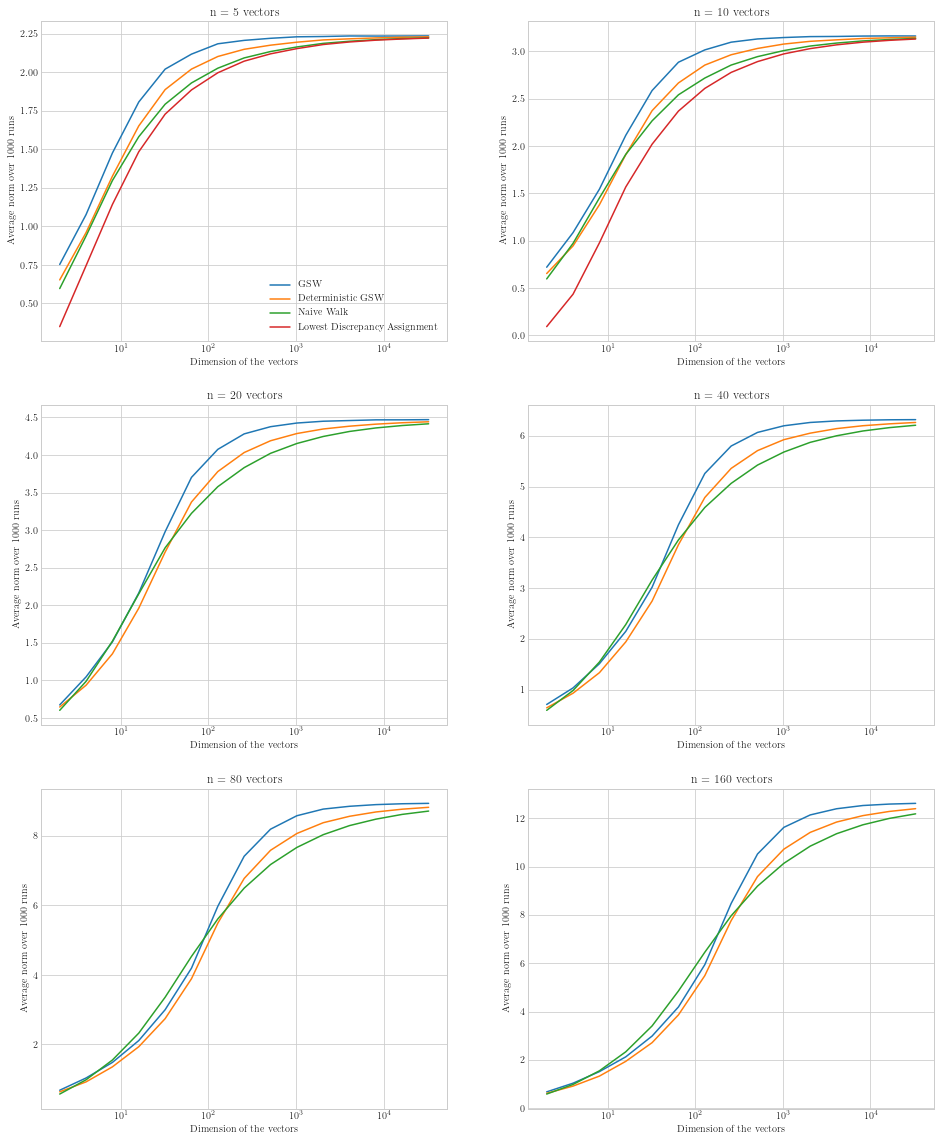

In [69]:
max_power=15.0
l=np.logspace(1.0, max_power, num=int(max_power), base=2.0)
n_list=[5,10,20,40,80,160]
#n_list=[5,10]
repeat=10**3
#repeat=10**1

#load dics
norms_gsw=open_dic_file('norms_gsw.pkl')
norms_gsw_det=open_dic_file('norms_gsw_det.pkl')
norms_naive=open_dic_file('norms_naive.pkl')
norms_best=open_dic_file('norms_best.pkl')
plot=0
for n in n_list:
    plot+=1
    print(f'n={n}')
    if norms_gsw.get(n) is None:
        norms_gsw[n]={}
    if norms_gsw_det.get(n) is None:
        norms_gsw_det[n]={}
    if norms_naive.get(n) is None:
        norms_naive[n]={}
    if norms_best.get(n) is None:
        norms_best[n]={}
    for d_ in l:
        d=int(d_)
        print(d)
        if norms_gsw[n].get(d) is None:
            norms_gsw[n][d]=[]
        if norms_gsw_det[n].get(d) is None:
            norms_gsw_det[n][d]=[]
        if norms_naive[n].get(d) is None:
            norms_naive[n][d]=[]
        if norms_best[n].get(d) is None:
            norms_best[n][d]=[]
        while min(len(norms_gsw[n][d]),len(norms_gsw_det[n][d]),len(norms_naive[n][d]))<repeat and (len(norms_best[n][d])<repeat or n>10):
            print(len(norms_gsw[n][d]))
            v=sample_from_ball(n,d=d)
            B=np.transpose(np.vstack(tuple([e for e in v])))
            if len(norms_gsw[n][d])<repeat:
                x=gram_schmidt_walk(v,np.zeros(n))
                norms_gsw[n][d].append(np.sqrt(sum([x_**2 for x_ in np.matmul(B,x)])))
            if len(norms_gsw_det[n][d])<repeat:
                x_det=gram_schmidt_walk(v,np.zeros(n),smallest_delta=True)
                norms_gsw_det[n][d].append(np.sqrt(sum([x_**2 for x_ in np.matmul(B,x_det)])))
            if len(norms_naive[n][d])<repeat:
                x_naive=naive_walk(v)
                norms_naive[n][d].append(np.sqrt(sum([x_**2 for x_ in np.matmul(B,x_naive)])))
            if n<=10 and len(norms_best[n][d])<repeat:
                disc,x_best=best_coloring(v)
                norms_best[n][d].append(disc)
    plt.subplot(3,2,plot)
    plt.plot(l,[average(norms_gsw[n][d]) for d in l],label=f'GSW')
    plt.plot(l,[average(norms_gsw_det[n][d]) for d in l],label=f'Deterministic GSW')
    plt.plot(l,[average(norms_naive[n][d]) for d in l],label=f'Naive Walk')
    if n<=10:
        plt.plot(l,[average(norms_best[n][d]) for d in l],label=f'Lowest Discrepancy Assignment')
    plt.title(f'n = {n} vectors')
    plt.xlabel('Dimension of the vectors')
    plt.ylabel(f'Average norm over {repeat} runs')
    if n==5:
        plt.legend()
    plt.xscale('log')
plt.savefig(f'comparative_norms_n={n_list}_repeat={repeat}_max_dim={2**max_power}.pdf')
tikzplotlib.save(f"comparative_norms_n={n}_repeat={repeat}_max_dim={2**max_power}.tex")
plt.show()

n=5
2
4
8
16
32
64
128
256
512
1024
2048
4096
8192
16384
32768
n=10
2
4
8
16
32
64
128
256
512
1024
2048
4096
8192
16384
32768
n=20
2
4
8
16
32
64
128
256
512
1024
2048
4096
8192
16384
32768
n=40
2
4
8
16
32
64
128
256
512
1024
2048
4096
8192
16384
32768
n=80
2
4
8
16
32
64
128
256
512
1024
2048
4096
8192
16384
32768
n=160
2
4
8
16
32
64
128
256
512
1024
2048
4096
8192
16384
32768


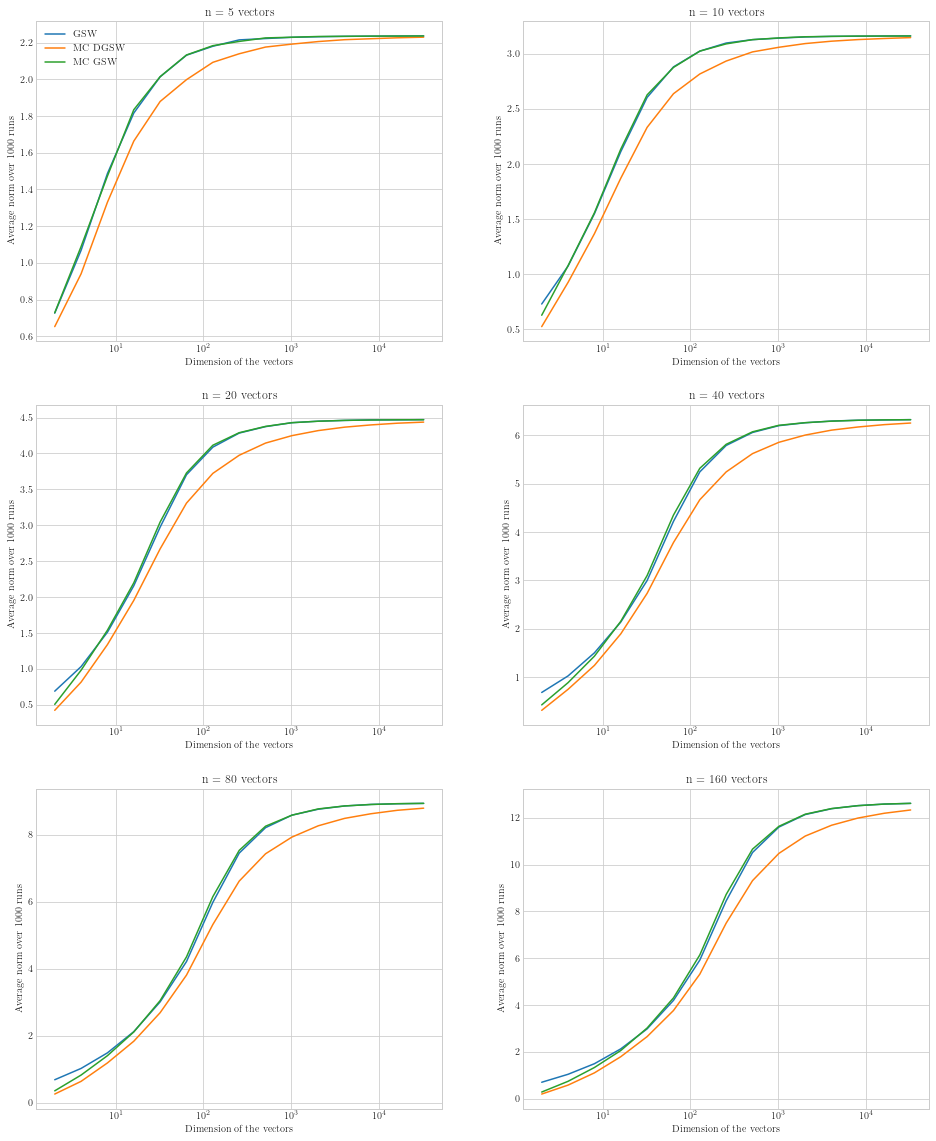

In [46]:
max_power=15.0
#max_power=5.0
l=np.logspace(1.0, max_power, num=int(max_power), base=2.0)
n_list=[5,10,20,40,80,160]
#n_list=[5,10]
repeat=10**3
foldername='max_coloring/'
#load dics
norms_gsw=open_dic_file(f'{foldername}norms_gsw.pkl')
norms_gsw_det_max_col=open_dic_file(f'{foldername}norms_gsw_det_max_col.pkl')
norms_gsw_max_col=open_dic_file(f'{foldername}norms_gsw_max_col.pkl')
plot=0
for n in n_list:
    plot+=1
    print(f'n={n}')
    if norms_gsw.get(n) is None:
        norms_gsw[n]={}
    if norms_gsw_det_max_col.get(n) is None:
        norms_gsw_det_max_col[n]={}
    if norms_gsw_max_col.get(n) is None:
        norms_gsw_max_col[n]={}
    for d_ in l:
        d=int(d_)
        print(d)
        if norms_gsw[n].get(d) is None:
            norms_gsw[n][d]=[]
        if norms_gsw_det_max_col[n].get(d) is None:
            norms_gsw_det_max_col[n][d]=[]
        if norms_gsw_max_col[n].get(d) is None:
            norms_gsw_max_col[n][d]=[]
        while min(len(norms_gsw[n][d]),len(norms_gsw_max_col[n][d]),len(norms_gsw_det_max_col[n][d]))<repeat:
            v=sample_from_ball(n,d=d)
            B=np.transpose(np.vstack(tuple([e for e in v])))
            if len(norms_gsw[n][d])<repeat:
                x=gram_schmidt_walk(v,np.zeros(n))
                norms_gsw[n][d].append(np.sqrt(sum([x_**2 for x_ in np.matmul(B,x)])))
            if len(norms_gsw_det_max_col[n][d])<repeat:
                x_det=gram_schmidt_walk(v,np.zeros(n),smallest_delta=True,mode='max_coloring')
                norms_gsw_det_max_col[n][d].append(np.sqrt(sum([x_**2 for x_ in np.matmul(B,x_det)])))
            if len(norms_gsw_max_col[n][d])<repeat:
                x_max_col=gram_schmidt_walk(v,np.zeros(n),mode='max_coloring')
                norms_gsw_max_col[n][d].append(np.sqrt(sum([x_**2 for x_ in np.matmul(B,x_max_col)])))
    plt.subplot(3,2,plot)
    plt.plot(l,[average(norms_gsw[n][d]) for d in l],label=f'GSW')
    plt.plot(l,[average(norms_gsw_det_max_col[n][d]) for d in l],label=f'MC DGSW')
    plt.plot(l,[average(norms_gsw_max_col[n][d]) for d in l],label=f'MC GSW')
    plt.title(f'n = {n} vectors')
    plt.xlabel('Dimension of the vectors')
    plt.ylabel(f'Average norm over {repeat} runs')
    if n==5:
        plt.legend()
    plt.xscale('log')
plt.savefig(f'{foldername}comparative_norms_n={n_list}_repeat={repeat}_max_dim={2**max_power}_max_col.pdf')
tikzplotlib.save(f"{foldername}comparative_norms_n={n}_repeat={repeat}_max_dim={2**max_power}_max_col.tex")
plt.show()

In [47]:
#### save dics
save_dic_to_file(norms_gsw,f'{foldername}norms_gsw.pkl')
save_dic_to_file(norms_gsw_det_max_col,f'{foldername}norms_gsw_det_max_col.pkl')
save_dic_to_file(norms_gsw_max_col,f'{foldername}norms_gsw_max_col.pkl')

In [5]:
max_power=15.0
max_power=5.0
l=np.logspace(1.0, max_power, num=int(max_power), base=2.0)
n_list=[5,10,20,40,80,160]
#n_list=[5,10]
repeat=10**3
repeat=10**1
foldername='min_move_random/'
#load dics
norms_gsw=open_dic_file(f'norms_gsw.pkl')
norms_gsw_det_max_col=open_dic_file(f'{foldername}norms_gsw_det_mmr.pkl')
norms_gsw_max_col=open_dic_file(f'{foldername}norms_gsw_mmr.pkl')
plot=0
for n in n_list:
    plot+=1
    print(f'n={n}')
    if norms_gsw.get(n) is None:
        norms_gsw[n]={}
    if norms_gsw_det_max_col.get(n) is None:
        norms_gsw_det_max_col[n]={}
    if norms_gsw_max_col.get(n) is None:
        norms_gsw_max_col[n]={}
    for d_ in l:
        d=int(d_)
        print(d)
        if norms_gsw[n].get(d) is None:
            norms_gsw[n][d]=[]
        if norms_gsw_det_max_col[n].get(d) is None:
            norms_gsw_det_max_col[n][d]=[]
        if norms_gsw_max_col[n].get(d) is None:
            norms_gsw_max_col[n][d]=[]
        while min(len(norms_gsw[n][d]),len(norms_gsw_max_col[n][d]),len(norms_gsw_det_max_col[n][d]))<repeat:
            v=sample_from_ball(n,d=d)
            B=np.transpose(np.vstack(tuple([e for e in v])))
            if len(norms_gsw[n][d])<repeat:
                x=gram_schmidt_walk(v,np.zeros(n))
                norms_gsw[n][d].append(np.sqrt(sum([x_**2 for x_ in np.matmul(B,x)])))
            if len(norms_gsw_det_max_col[n][d])<repeat:
                x_det=gram_schmidt_walk(v,np.zeros(n),smallest_delta=True,mode='min_move_random',no_matrix_mult=True)
                norms_gsw_det_max_col[n][d].append(np.sqrt(sum([x_**2 for x_ in np.matmul(B,x_det)])))
            if len(norms_gsw_max_col[n][d])<repeat:
                x_max_col=gram_schmidt_walk(v,np.zeros(n),mode='min_move_random',no_matrix_mult=True)
                norms_gsw_max_col[n][d].append(np.sqrt(sum([x_**2 for x_ in np.matmul(B,x_max_col)])))
    plt.subplot(3,2,plot)
    plt.plot(l,[average(norms_gsw[n][d]) for d in l],label=f'GSW')
    plt.plot(l,[average(norms_gsw_det_max_col[n][d]) for d in l],label=f'MMR DGSW')
    plt.plot(l,[average(norms_gsw_max_col[n][d]) for d in l],label=f'MMR GSW')
    plt.title(f'n = {n} vectors')
    plt.xlabel('Dimension of the vectors')
    plt.ylabel(f'Average norm over {repeat} runs')
    if n==5:
        plt.legend()
    plt.xscale('log')
plt.savefig(f'{foldername}comparative_norms_n={n_list}_repeat={repeat}_max_dim={2**max_power}_mmr.pdf')
tikzplotlib.save(f"{foldername}comparative_norms_n={n}_repeat={repeat}_max_dim={2**max_power}_mmr.tex")
plt.show()

n=5
2
Unknown mode of pivot choice: aborting.
Unknown mode of pivot choice: aborting.
Unknown mode of pivot choice: aborting.
No delta>=0: [ 0.  0.  0. -0. -0. -0. -0. -0.]
No delta<=0: [ 0.  0.  0. -0. -0. -0. -0. -0.]


C:\Users\Ga Bo\Desktop\Master Thesis\GSWalk\gsw.py:573: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  sol=np.linalg.lstsq(m, i)
C:\Users\Ga Bo\Desktop\Master Thesis\GSWalk\gsw.py:272: RuntimeWarning: divide by zero encountered in true_divide
  update=B_S[i,:]/B_S[i,i]
C:\Users\Ga Bo\Desktop\Master Thesis\GSWalk\gsw.py:272: RuntimeWarning: invalid value encountered in true_divide
  update=B_S[i,:]/B_S[i,i]


UnboundLocalError: local variable 'd_p' referenced before assignment

In [ ]:
#### save dics
save_dic_to_file(norms_gsw,f'norms_gsw.pkl')
save_dic_to_file(norms_gsw_det_max_col,f'{foldername}norms_gsw_det_mmr.pkl')
save_dic_to_file(norms_gsw_max_col,f'{foldername}norms_gsw_mmr.pkl')